In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Room Temperature Calculation

In [17]:
D_room = np.array([7.1,8.6,22.1,35.0,46.7])
D_room_err = np.array([0.05,0.05,0.05,0.05,0.05])

x=np.array([-10,-9,-6,-3,0])
x_new=np.array(x).reshape((-1, 1))


In [18]:
model = LinearRegression().fit(x_new, D_room)
r_sq = model.score(x_new, D_room)

In [19]:
print(f"coefficient of determination: {r_sq}")
inter=model.intercept_
inter=46.7
print(f"intercept: {model.intercept_}")
slope=model.coef_
print(f"slope: {model.coef_}")

coefficient of determination: 0.9968793823557576
intercept: 46.81791907514451
slope: [4.09248555]


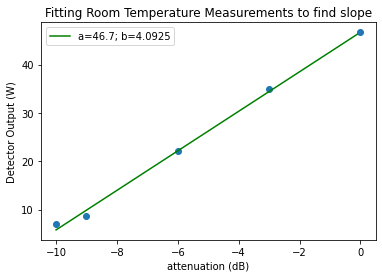

In [20]:
plt.scatter(x,D_room)

x_fit=np.arange(-10,0,step=0.1)
y_fit=inter+slope*x_fit

plt.plot(x_fit,y_fit,color="green",label="a=" +str(np.round(inter,4)) + "; b=" + str(np.round(float(slope),4))) 
plt.xlabel("attenuation (dB)")
plt.ylabel("Detector Output (W)")

plt.title("Fitting Room Temperature Measurements to find slope")
plt.legend()
plt.show()


with error


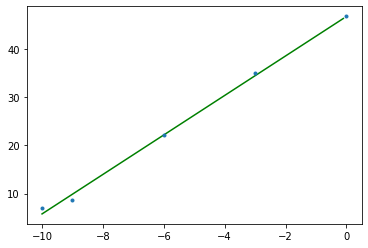

In [21]:
plt.errorbar(x,D_room,yerr=D_room_err,fmt='.',label="data")
plt.plot(x_fit,y_fit,color="green",label="a=" +str(np.round(inter,4)) + "; b=" + str(np.round(float(slope),4)))
print("with error")

CMB

In [28]:
CMB = np.array([2.4,2.5,3.3,9.8,23.5])
#D_room_err = np.array([0.05,0.05,0.05,0.05,0.05])

x=np.array([-10,-9,-6,-3,0])
x_new=np.array(x).reshape((-1, 1))


In [29]:
model = LinearRegression().fit(x_new, CMB)
r_sq = model.score(x_new, CMB)

TypeError: fit() got an unexpected keyword argument 'fit_intercept'

In [30]:
print(f"coefficient of determination: {r_sq}")
inter=model.intercept_
print(f"intercept: {model.intercept_}")
slope=model.coef_
print(f"slope: {model.coef_}")

coefficient of determination: 0.8264729234430445
intercept: 19.36242774566474
slope: [1.97543353]


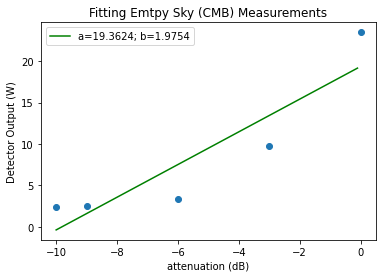

In [31]:
plt.scatter(x,CMB)

x_fit=np.arange(-10,0,step=0.1)
y_fit=inter+slope*x_fit

plt.plot(x_fit,y_fit,color="green",label="a=" +str(np.round(inter,4)) + "; b=" + str(np.round(float(slope),4))) 
plt.xlabel("attenuation (dB)")
plt.ylabel("Detector Output (W)")

plt.title("Fitting Emtpy Sky (CMB) Measurements")
plt.legend()
plt.show()


In [38]:
def my_fun(inter_mu):
    
    inter=23.5
    mu=inter_mu[1]
    
    CMB = np.array([2.4,2.5,3.3,9.8,23.5])

    x=np.array([-10,-9,-6,-3,0])
    x_new=np.array(x).reshape((-1, 1))

    
    model=inter+mu*x
    
    result=0
    for i in range(0,len(x)):
        result+=(CMB[i]-model[i])**2

    

    return result
    

z=my_fun(inter_mu=[23.5, 2])

print(z)

136.73999999999998


In [42]:
import scipy

x0=[23.5,2]

print(scipy.optimize.minimize(my_fun,x0,method="SLSQP"))
#print("Al Chi^2 minimization: chi^2=1.1003383527890525, intercept=0.04061259, mu=0.18592093")

     fun: 82.90774336283188
     jac: array([0.00000000e+00, 9.53674316e-07])
 message: 'Optimization terminated successfully'
    nfev: 9
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([23.5       ,  2.48805309])


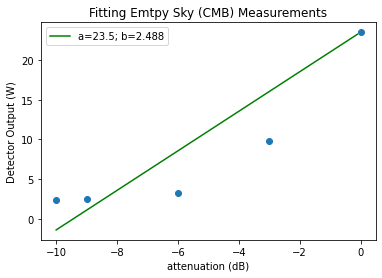

In [45]:
inter_fit=23.5
slope_fit=2.48805

plt.scatter(x,CMB)

x_fit=np.arange(-10,0,step=0.1)
y_fit=inter_fit+slope_fit*x_fit

plt.plot(x_fit,y_fit,color="green",label="a=" +str(np.round(inter_fit,4)) + "; b=" + str(np.round(float(slope_fit),4))) 
plt.xlabel("attenuation (dB)")
plt.ylabel("Detector Output (W)")

plt.title("Fitting Emtpy Sky (CMB) Measurements")
plt.legend()
plt.show()


In [48]:
CMB_fitted=slope_fit*x+inter_fit
print(x)
print(CMB_fitted)

[-10  -9  -6  -3   0]
[-1.3805   1.10755  8.5717  16.03585 23.5    ]
